# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** ASHRI AULIA AZZAHRA
- **Email:** m672b4kx0694@bangkit.academy
- **ID Dicoding:** ashriaulia

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : **Apakah cuaca (weather, temperature, humidity) memengaruhi jumlah penyewaan sepeda?**
- Pertanyaan 2 : **Bagaimana tren penyewaan sepeda berdasarkan musim (season)?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
day_url = "https://raw.githubusercontent.com/ashriazzr/submission-data-analyst-dicoding/refs/heads/main/data/day.csv"
hour_url = "https://raw.githubusercontent.com/ashriazzr/submission-data-analyst-dicoding/refs/heads/main/data/hour.csv"

df_day = pd.read_csv(day_url)
df_hour = pd.read_csv(hour_url)

In [ ]:
# day_df = pd.read_csv('day.csv')
# hour_df = pd.read_csv('hour.csv')

**Insight:**
- Memuat 2 datasets

## Data Wrangling

### Gathering Data

### Assessing Data

In [3]:
print("Informasi df_day:")
print(df_day.info())
print("\nStatistik deskriptif df_day:")
print(df_day.describe())
print("\nJumlah nilai null pada df_day:")
print(df_day.isnull().sum())
print("\nContoh data df_day:")
print(df_day.head())

Informasi df_day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Statistik deskriptif df_day:
          instant      season          y

In [4]:
print("\n\nInformasi df_hour:")
print(df_hour.info())
print("\nStatistik deskriptif df_hour:")
print(df_hour.describe())
print("\nJumlah nilai null pada df_hour:")
print(df_hour.isnull().sum())
print("\nContoh data df_hour:")
print(df_hour.head())



Informasi df_hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Statistik deskriptif d

**Insight:**
- Rata-rata penggunaan sepeda terjadi pada jam 11 (sekitar pukul 11 pagi), yang menunjukkan bahwa pada waktu-waktu sekitar jam tersebut, permintaan sepeda mungkin paling tinggi.
- permintaan sepeda lebih tinggi pada suhu dan kelembapan yang lebih moderat (tidak terlalu panas atau dingin).

### Cleaning Data

In [23]:
print("\nJumlah duplikat pada df_day:", df_day.duplicated().sum())

print("\nJumlah duplikat pada df_hour:", df_hour.duplicated().sum())

df_day['dteday'] = pd.to_datetime(df_day['dteday'])

print("\ df_day setelah cleaning:")
print(df_day.info())

print("\nContoh data df_day setelah cleaning:")
print(df_day.head())


Jumlah duplikat pada df_day: 0

Jumlah duplikat pada df_hour: 0
\ df_day setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    in

In [22]:


df_day_cleaned = df_day.drop(columns=['instant', 'dteday', 'casual', 'registered'])
df_hour_cleaned = df_hour.drop(columns=['instant', 'dteday', 'casual', 'registered'])

columns_rename = {
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total_count'
}
df_day_cleaned.rename(columns=columns_rename, inplace=True)
df_hour_cleaned.rename(columns=columns_rename, inplace=True)

print("Checking for missing values in day dataset:")
print(df_day_cleaned.isnull().sum())

print("Checking for missing values in hour dataset:")
print(df_hour_cleaned.isnull().sum())

df_day_cleaned.fillna(method='ffill', inplace=True)
df_hour_cleaned.fillna(method='ffill', inplace=True)

df_day_cleaned['data_source'] = 'day'
df_hour_cleaned['data_source'] = 'hour'

Checking for missing values in day dataset:
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
total_count          0
dtype: int64
Checking for missing values in hour dataset:
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_situation    0
temp                 0
atemp                0
humidity             0
windspeed            0
total_count          0
dtype: int64


<ipython-input-22-b2dfba14472b>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_day_cleaned.fillna(method='ffill', inplace=True)
<ipython-input-22-b2dfba14472b>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hour_cleaned.fillna(method='ffill', inplace=True)


**Insight:**
- Tidak ada missing values dan duplikat dalam dataset.
- Data sudah siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

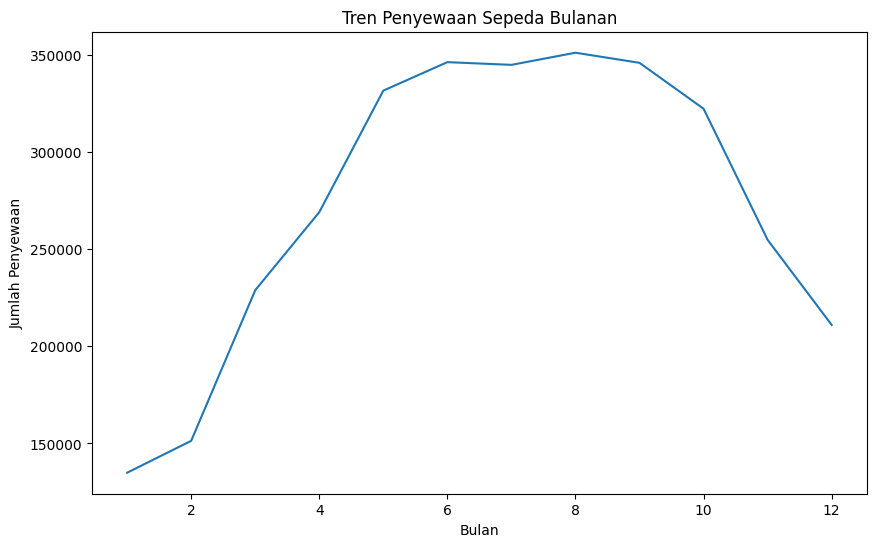

In [6]:
# Analisis Tren Penyewaan Sepeda Bulanan
monthly_rentals = df_day.groupby(df_day['dteday'].dt.month)['cnt'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values)
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

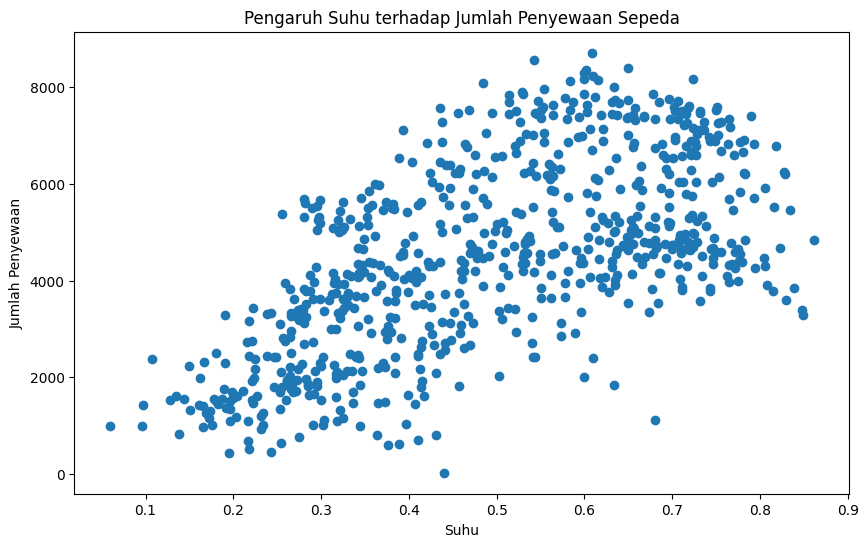

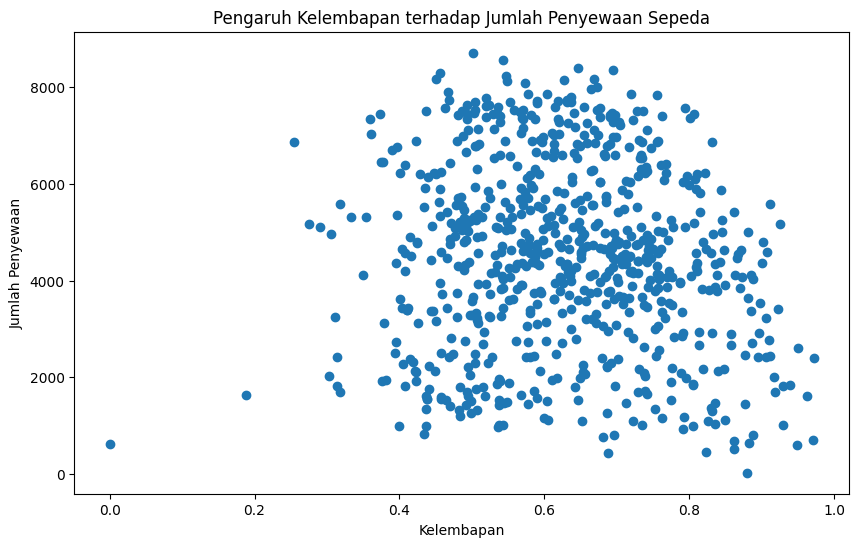

In [7]:
# Analisis Pengaruh Suhu dan Kelembapan terhadap Penyewaan Sepeda
plt.figure(figsize=(10, 6))
plt.scatter(df_day['temp'], df_day['cnt'])
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_day['hum'], df_day['cnt'])
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


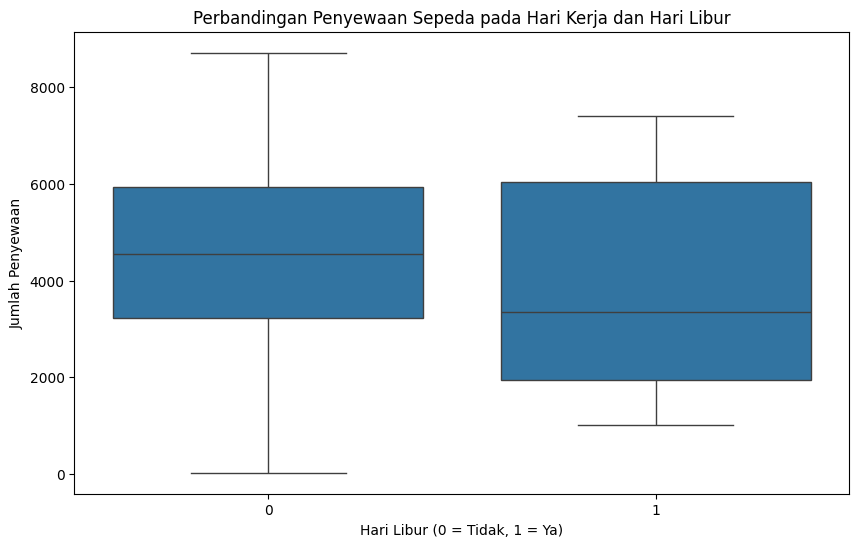

In [8]:
# Analisis Perbandingan Penyewaan Sepeda pada Hari Kerja dan Hari Libur
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt', data=df_day)
plt.title('Perbandingan Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari Libur (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

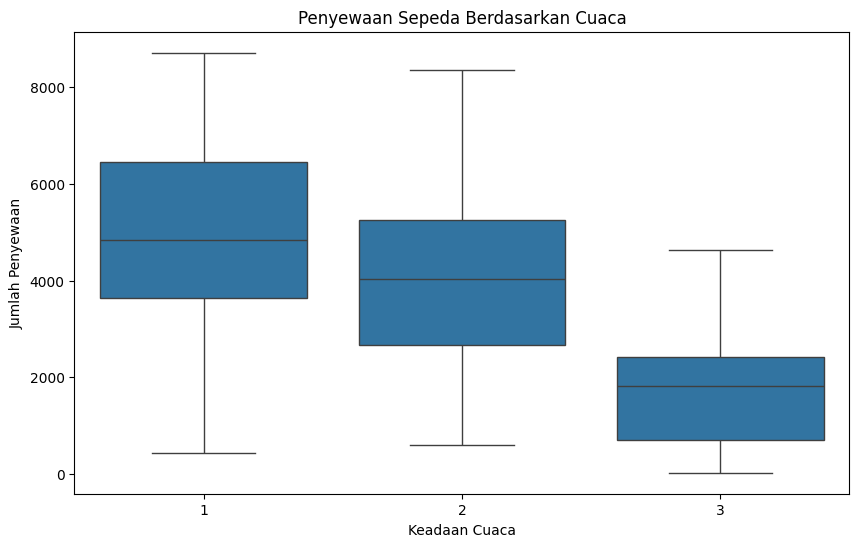

In [9]:
# Analisis Penyewaan Sepeda Berdasarkan Cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Keadaan Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()


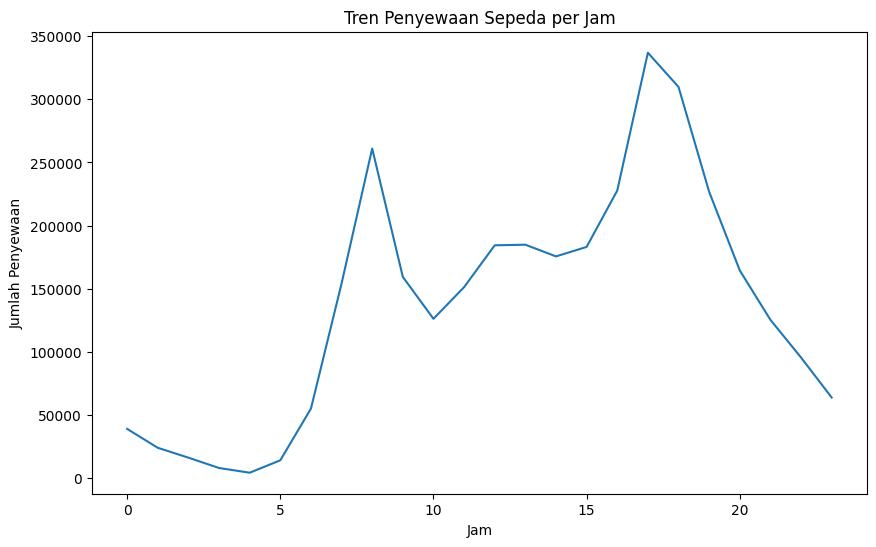

In [10]:
# Analisis Penyewaan Sepeda per Jam
hourly_rentals = df_hour.groupby(df_hour['hr'])['cnt'].sum()
plt.figure(figsize=(10, 6))
plt.plot(hourly_rentals.index, hourly_rentals.values)
plt.title('Tren Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

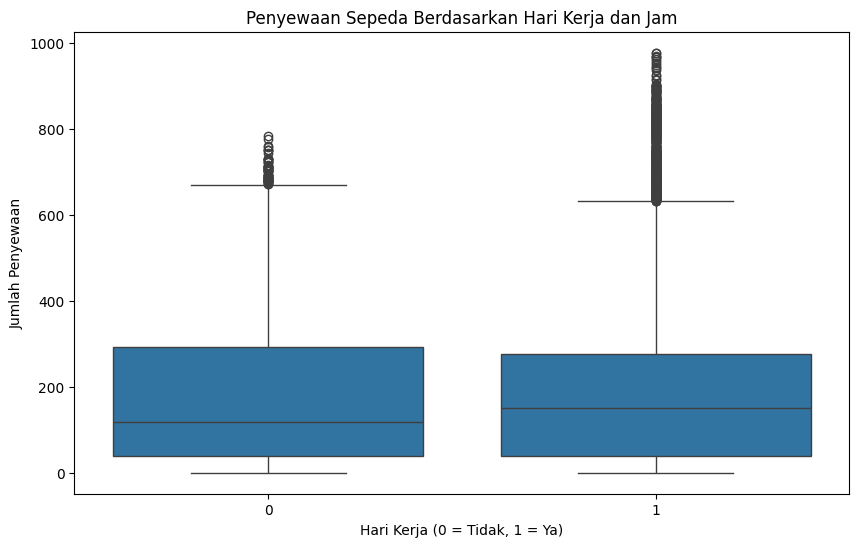

In [11]:
# Analisis Penyewaan Sepeda Berdasarkan Hari Kerja dan Jam
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df_hour)
plt.title('Penyewaan Sepeda Berdasarkan Hari Kerja dan Jam')
plt.xlabel('Hari Kerja (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

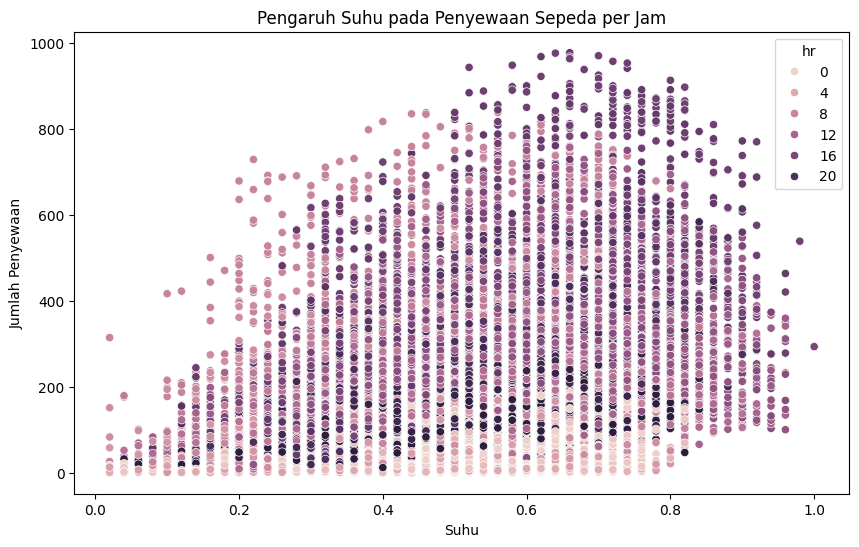

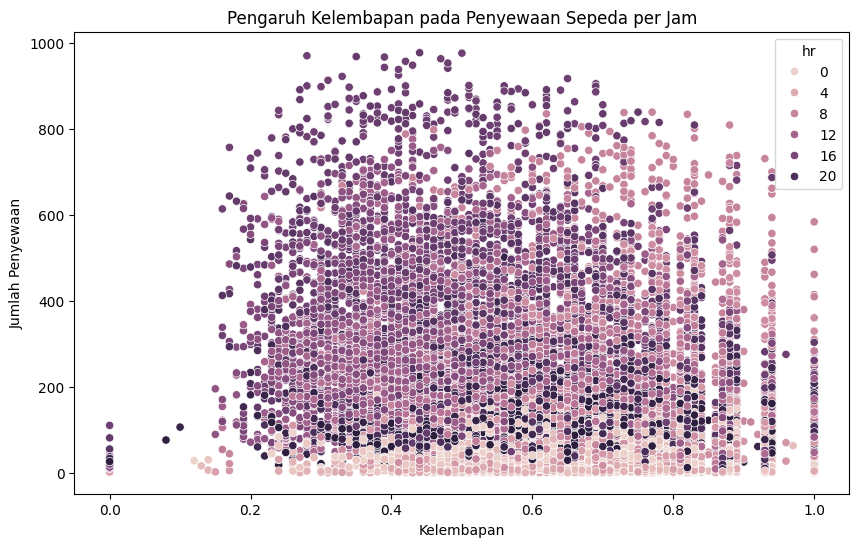

In [12]:
# Analisis Pengaruh Suhu dan Kelembapan pada Penyewaan Sepeda per Jam
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='hr', data=df_hour)
plt.title('Pengaruh Suhu pada Penyewaan Sepeda per Jam')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', hue='hr', data=df_hour)
plt.title('Pengaruh Kelembapan pada Penyewaan Sepeda per Jam')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- **Bentuk Distribusi:**
**Distribusi jumlah penyewaan sepeda harian berbentuk mendekati normal (bell-shaped).
Sebagian besar penyewaan harian berkisar antara 3000 hingga 6000.**

- **Frekuensi Tertinggi:**
**Frekuensi tertinggi terjadi pada rentang sekitar 4000-5000 jumlah penyewaan.**

- **Ekstrim:**
**Penyewaan di bawah 1000 atau di atas 8000 jarang terjadi, mencerminkan data yang lebih umum terkonsentrasi di tengah distribusi.**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca memengaruhi jumlah penyewaan sepeda?

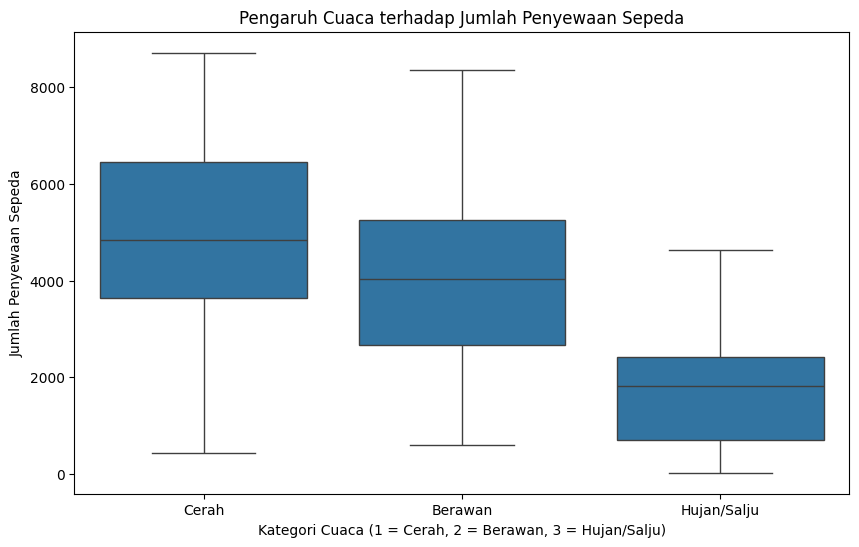

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kategori Cuaca (1 = Cerah, 2 = Berawan, 3 = Hujan/Salju)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2], ['Cerah', 'Berawan', 'Hujan/Salju'])
plt.show()


**Insight:**

Pertanyaan 1 :
- Penyewaan sepeda tertinggi terjadi pada kategori cuaca cerah (1).
- Penyewaan sepeda menurun signifikan saat cuaca berawan atau berkabut (kategori 2) dan semakin rendah saat hujan atau badai (kategori 3).

### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim?


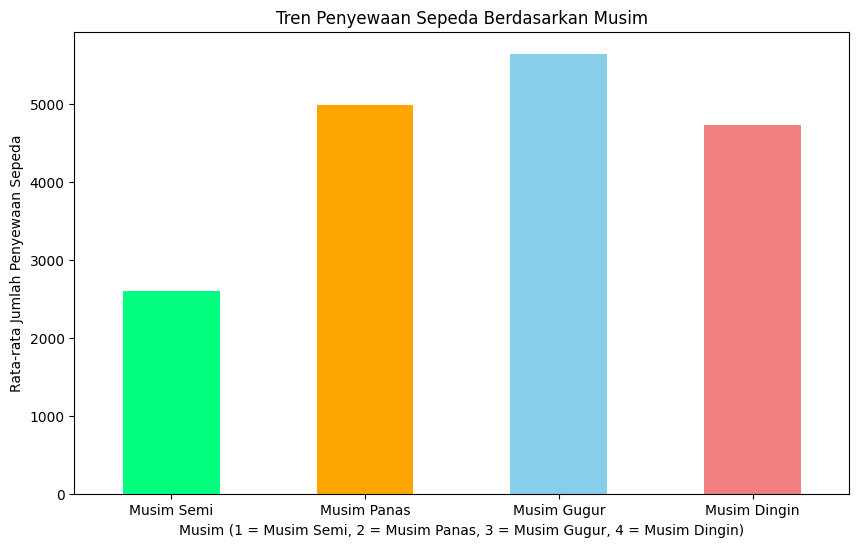

In [14]:
seasonal_rentals = df_day.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
seasonal_rentals.plot(kind='bar', color=['springgreen', 'orange', 'skyblue', 'lightcoral'])
plt.title('Tren Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'], rotation=0)
plt.show()



**Insight:**

Pertanyaan 2 :
- Penyewaan sepeda cenderung lebih tinggi selama musim panas (2) dan musim gugur (3).
- Penyewaan sepeda lebih rendah selama musim dingin (4), kemungkinan karena cuaca yang lebih dingin dan kurang nyaman untuk bersepeda.

## Analisis Lanjutan (Opsional)

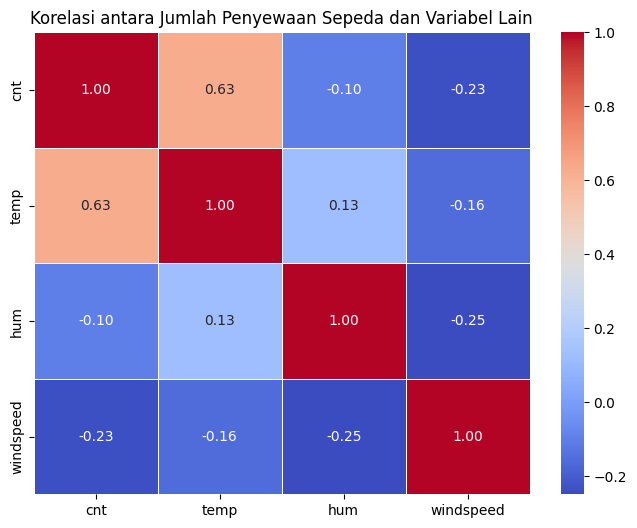

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_day[['cnt', 'temp', 'hum', 'windspeed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Jumlah Penyewaan Sepeda dan Variabel Lain')
plt.show()


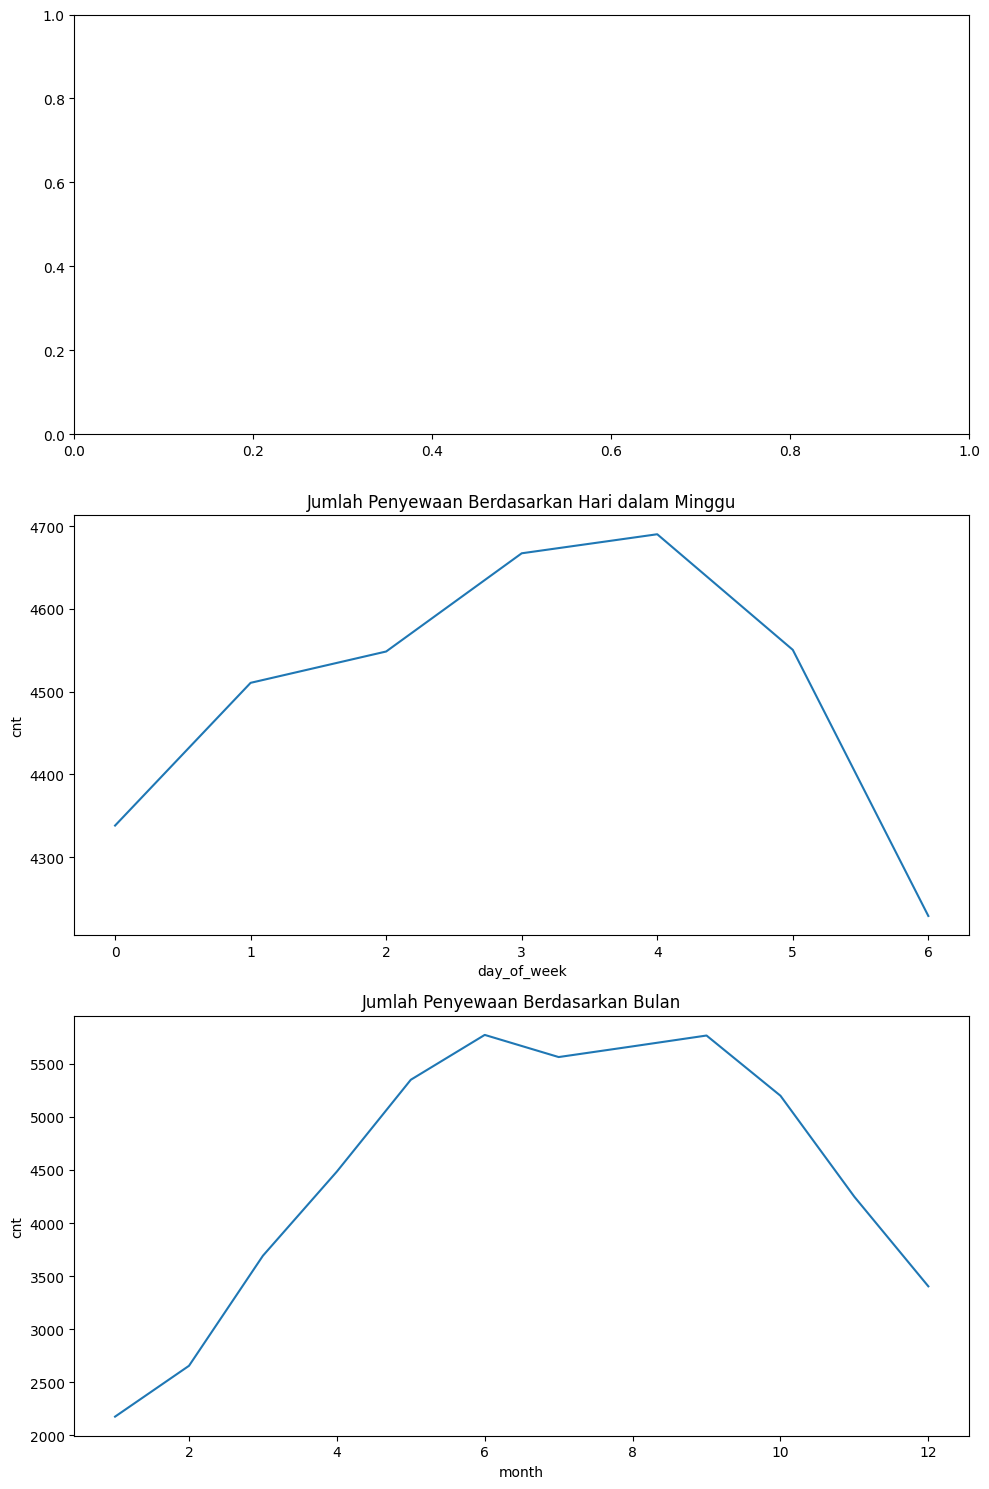

In [16]:
df_day['day_of_week'] = pd.to_datetime(df_day['dteday']).dt.dayofweek
weekly_rentals = df_day.groupby('day_of_week')['cnt'].mean().reset_index()

df_day['month'] = pd.to_datetime(df_day['dteday']).dt.month
monthly_rentals = df_day.groupby('month')['cnt'].mean().reset_index()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Weekly
sns.lineplot(data=weekly_rentals, x='day_of_week', y='cnt', ax=axs[1])
axs[1].set_title('Jumlah Penyewaan Berdasarkan Hari dalam Minggu')

# Monthly
sns.lineplot(data=monthly_rentals, x='month', y='cnt', ax=axs[2])
axs[2].set_title('Jumlah Penyewaan Berdasarkan Bulan')

plt.tight_layout()
plt.show()


 **Visualisasi Tren Waktu (Minggu, Bulan)**

Melihat tren jumlah penyewaan sepeda berdasarkan waktu, seperti per jam, per hari dalam minggu, dan per bulan.

## Conclusion

Kesimpulan:
1. Cuaca memengaruhi penyewaan sepeda: Penyewaan lebih tinggi pada cuaca cerah dan menurun saat cuaca berawan atau hujan.
2. Tren penyewaan berdasarkan musim: Penyewaan tertinggi pada musim panas dan gugur, sementara musim dingin memiliki penyewaan terendah.

In [ ]:
# import pandas as pd

# weather_impact = df_day.groupby('weathersit')['cnt'].mean().reset_index()
# weather_impact.columns = ['Weather_Situation', 'Average_Rentals']

# seasonal_rentals = df_day.groupby('season')['cnt'].mean().reset_index()
# seasonal_rentals.columns = ['Season', 'Average_Rentals']

# all_data = pd.concat([
#     weather_impact.assign(Category='Weather Impact'),
#     seasonal_rentals.assign(Category='Seasonal Trend')
# ])

# all_data.to_csv('all_data.csv', index=False)

# print("File all_data.csv berhasil disimpan!")


File all_data.csv berhasil disimpan!


In [17]:
# all_data = pd.concat([df_day, df_hour], axis=0, ignore_index=True)

# output_file = "all_data.csv"
# all_data.to_csv(output_file, index=False)

# print(f"Data berhasil disimpan ke file {output_file}")


Data berhasil disimpan ke file all_data.csv


In [24]:
import pandas as pd




all_data = pd.concat([df_day_cleaned, df_hour_cleaned], ignore_index=True)

output_file = "all_data.csv"
all_data.to_csv(output_file, index=False)
print(f"Combined data saved to {output_file}")


Combined data saved to all_data.csv
